## Introduction Section 

## BUSINESS PROBLEM :

#### Analyze the NewYork Data and find the good choice to start the Restaurant in any of the "Borough" in NewYork.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import json
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline
from sklearn.metrics import silhouette_score

## Data Section

#### Gathered all the required data for Analysis

### Import the NewYork Data and clean it.

In [2]:
import wget
#newyork_data = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json')

In [3]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)


neighborhoods_data = newyork_data['features']
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
ny_neighborhoods = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    ny_neighborhoods = ny_neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [4]:
#Newyork Data

ny_neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


## Methodology Section
#### Segment the data into Borough and visualize them on map and applied the K-Means algorithm to cluser the nearest Neighborhood Venues.

### Find the geographical coordinates of Newyork and visualize the Neighborhood on map. 

In [5]:
#Geographical coordinated of Newyork

ny_address = 'New York City, NY'

ny_geolocator = Nominatim(user_agent="ny_explorer")
ny_location = ny_geolocator.geocode(ny_address)
ny_latitude = ny_location.latitude
ny_longitude = ny_location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(ny_latitude, ny_longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [6]:
#Create a Map of Newyork

# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ny_neighborhoods['Latitude'], ny_neighborhoods['Longitude'], ny_neighborhoods['Borough'], ny_neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [7]:
ny_neighborhoods["Borough"].count()

306

####  Below are the list of "Borough" in Newyork City
- Bronx
- Manhattan
- Brooklyn
- Queens
- Staten Island

In [8]:
# Check the "Borough" in Newyork City

ny_neighborhoods["Borough"].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

## Segment each "Borough" and Visualize their Neighborhood on Map.

In [9]:
# Segment the "Borough" in Newyork and visualize the respective "Borough" and it's Neighborhood on map.

ny_neighborhoods_Bronx = ny_neighborhoods[ny_neighborhoods["Borough"] == 'Bronx'].reset_index(drop = True)
ny_neighborhoods_Manhattan = ny_neighborhoods[ny_neighborhoods["Borough"] == 'Manhattan'].reset_index(drop = True)
ny_neighborhoods_Brooklyn = ny_neighborhoods[ny_neighborhoods["Borough"] == 'Brooklyn'].reset_index(drop = True)
ny_neighborhoods_Queens = ny_neighborhoods[ny_neighborhoods["Borough"] == 'Queens'].reset_index(drop = True)
ny_neighborhoods_Staten = ny_neighborhoods[ny_neighborhoods["Borough"] == "Staten Island"].reset_index(drop = True)

### Finding the geographical coordinates of "Bronx" and visualize it's Neighbors on Map.

In [10]:
# Bronx and it's Neighborhood Data
ny_neighborhoods_Bronx.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [11]:
#Geograhical Coordinates of Bronx

bronx_address = 'Bronx'

Bronx_geolocator = Nominatim(user_agent="myGeocoder")
Bronx_location = Bronx_geolocator.geocode(bronx_address)
Bronx_latitude = Bronx_location.latitude
Bronx_longitude = Bronx_location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(Bronx_latitude, Bronx_longitude))

The geograpical coordinate of Bronx are 40.8466508, -73.8785937.


In [12]:
#segment and cluster only the neighborhoods in Bronx.

#Create a Map of Bronx

# create map of New York using latitude and longitude values
map_Bronx = folium.Map(location=[Bronx_latitude, Bronx_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ny_neighborhoods_Bronx['Latitude'], ny_neighborhoods_Bronx['Longitude'], ny_neighborhoods_Bronx['Borough'], ny_neighborhoods_Bronx['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Bronx)  
    
map_Bronx

### Finding the geographical coordinates of "Manhattan" and visualize it's Neighbors on Map.

In [13]:
## Manhattan and it's Neighborhood data

ny_neighborhoods_Manhattan.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [14]:
#Visualize Manhattan and it's Neighbors on map.

#Geograhical Coordinates of Manhattan

Manhattan_address = 'Manhattan'

Manhattan_geolocator = Nominatim(user_agent="myGeocoder")
Manhattan_location = Manhattan_geolocator.geocode(Manhattan_address)
Manhattan_latitude = Manhattan_location.latitude
Manhattan_longitude = Manhattan_location.longitude
print('The geograpical coordinate of Manhattan City are {}, {}.'.format(Manhattan_latitude, Manhattan_longitude))

The geograpical coordinate of Manhattan City are 40.7896239, -73.9598939.


In [15]:
#segment and cluster only the neighborhoods in Manhattan.

#Create a Map of Manhattan

map_Manhattan = folium.Map(location=[Manhattan_latitude, Manhattan_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ny_neighborhoods_Manhattan['Latitude'], ny_neighborhoods_Manhattan['Longitude'], ny_neighborhoods_Manhattan['Borough'], ny_neighborhoods_Manhattan['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Manhattan)  
    
map_Manhattan

### Finding the geographical coordinates of "Queens" and visualize it's Neighbors on Map.

In [16]:
## Queens and it's Neighborhood data

ny_neighborhoods_Queens.head()

,Borough,Neighborhood,Latitude,Longitude
0,Queens,Astoria,40.768509,-73.915654
1,Queens,Woodside,40.746349,-73.901842
2,Queens,Jackson Heights,40.751981,-73.882821
3,Queens,Elmhurst,40.744049,-73.881656
4,Queens,Howard Beach,40.654225,-73.838138


In [17]:
#Visualize Queens and it's Neighbors on map.

#Geograhical Coordinates of Queens

Queens_address = 'Queens'

Queens_geolocator = Nominatim(user_agent="myGeocoder")
Queens_location = Queens_geolocator.geocode(Queens_address)
Queens_latitude = Queens_location.latitude
Queens_longitude = Queens_location.longitude
print('The geograpical coordinate of Queens City are {}, {}.'.format(Queens_latitude, Queens_longitude))

The geograpical coordinate of Queens City are 40.7498243, -73.7976337.


In [18]:
#segment and cluster only the neighborhoods in Queens.

#Create a Map of Queens

map_Queens = folium.Map(location=[Queens_latitude, Queens_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ny_neighborhoods_Queens['Latitude'], ny_neighborhoods_Queens['Longitude'], ny_neighborhoods_Queens['Borough'], ny_neighborhoods_Queens['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Queens)  
    
map_Queens

### Finding the geographical coordinates of "Staten Island" and visualize it's Neighbors on Map.

In [19]:
# #Staten Island" and it's Neighborhood Data
ny_neighborhoods_Staten.head()

,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


In [20]:
#Visualize Staten Island and it's Neighbors on map.

#Geograhical Coordinates of Staten Island

Staten_address = 'Staten Island'

Staten_geolocator = Nominatim(user_agent="myGeocoder")
Staten_location = Staten_geolocator.geocode(Staten_address)
Staten_latitude = Staten_location.latitude
Staten_longitude = Staten_location.longitude
print('The geograpical coordinate of Staten Island City are {}, {}.'.format(Staten_latitude, Staten_longitude))

The geograpical coordinate of Staten Island City are 40.5834557, -74.1496048.


In [21]:
#segment and cluster only the neighborhoods in Staten Island.

#Create a Map of Staten

map_Staten = folium.Map(location=[Staten_latitude, Staten_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ny_neighborhoods_Staten['Latitude'], ny_neighborhoods_Staten['Longitude'], ny_neighborhoods_Staten['Borough'], ny_neighborhoods_Staten['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Staten)  
    
map_Staten

### Finding the geogrpahical coordinates of "Brooklyn" and visualize it's Neighbors on Map.

In [22]:
## Brooklyn and it's Neighborhood data

ny_neighborhoods_Brooklyn.head()

,Borough,Neighborhood,Latitude,Longitude
0,Brooklyn,Bay Ridge,40.625801,-74.030621
1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,Brooklyn,Sunset Park,40.645103,-74.010316
3,Brooklyn,Greenpoint,40.730201,-73.954241
4,Brooklyn,Gravesend,40.595260,-73.973471


In [23]:
#Visualize Brooklyn and it's Neighbors on map.

#Geograhical Coordinates of Brooklyn

Brooklyn_address = 'Brooklyn'

Brooklyn_geolocator = Nominatim(user_agent="myGeocoder")
Brooklyn_location = Brooklyn_geolocator.geocode(Brooklyn_address)
Brooklyn_latitude = Brooklyn_location.latitude
Brooklyn_longitude = Brooklyn_location.longitude
print('The geograpical coordinate of Brooklyn City are {}, {}.'.format(Brooklyn_latitude, Brooklyn_longitude))

The geograpical coordinate of Brooklyn City are 40.6501038, -73.9495823.


In [24]:
#segment and cluster only the neighborhoods in Brooklyn.

#Create a Map of Brooklyn

map_Brooklyn = folium.Map(location=[Brooklyn_latitude, Brooklyn_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(ny_neighborhoods_Brooklyn['Latitude'], ny_neighborhoods_Brooklyn['Longitude'], ny_neighborhoods_Brooklyn['Borough'], ny_neighborhoods_Brooklyn['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Brooklyn)  
    
map_Brooklyn

## Explore Neighborhood

In [25]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: 3VKVAWMQJ5JH32OTAUKQ5PBGORDVXKDMQ2E32TAQIRO35NOX
CLIENT_SECRET:5PQTMK5Q24DKN3JLTTP1OJU2JADWZAJGPX3U2KUD2VYS3QCW


In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
#Find the Bronx venues data from FourSquare.

Bronx_venues = getNearbyVenues(names=ny_neighborhoods_Bronx['Neighborhood'],
                                   latitudes=ny_neighborhoods_Bronx['Latitude'],
                                   longitudes=ny_neighborhoods_Bronx['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [28]:
#Find the Manhattan venues data from FourSquare.

Manhattan_venues = getNearbyVenues(names=ny_neighborhoods_Manhattan['Neighborhood'],
                                   latitudes=ny_neighborhoods_Manhattan['Latitude'],
                                   longitudes=ny_neighborhoods_Manhattan['Longitude']
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [29]:
#Find the Brooklyn venues data from FourSquare.

Brooklyn_venues = getNearbyVenues(names=ny_neighborhoods_Brooklyn['Neighborhood'],
                                   latitudes=ny_neighborhoods_Brooklyn['Latitude'],
                                   longitudes=ny_neighborhoods_Brooklyn['Longitude']
                                  )

Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker Heights
Gerritsen Beach
Marine Park
Clinton Hill
Sea Gate
Downtown
Boerum Hill
Prospect Lefferts Gardens
Ocean Hill
City Line
Bergen Beach
Midwood
Prospect Park South
Georgetown
East Williamsburg
North Side
South Side
Ocean Parkway
Fort Hamilton
Ditmas Park
Wingate
Rugby
Remsen Village
New Lots
Paerdegat Basin
Mill Basin
Fulton Ferry
Vinegar Hill
Weeksville
Broadway Junction
Dumbo
Homecrest
Highland Park
Madison
Erasmus


In [30]:
#Find the Queens venues data from FourSquare.

Queens_venues = getNearbyVenues(names=ny_neighborhoods_Queens['Neighborhood'],
                                   latitudes=ny_neighborhoods_Queens['Latitude'],
                                   longitudes=ny_neighborhoods_Queens['Longitude']
                                  )

Astoria
Woodside
Jackson Heights
Elmhurst
Howard Beach
Corona
Forest Hills
Kew Gardens
Richmond Hill
Flushing
Long Island City
Sunnyside
East Elmhurst
Maspeth
Ridgewood
Glendale
Rego Park
Woodhaven
Ozone Park
South Ozone Park
College Point
Whitestone
Bayside
Auburndale
Little Neck
Douglaston
Glen Oaks
Bellerose
Kew Gardens Hills
Fresh Meadows
Briarwood
Jamaica Center
Oakland Gardens
Queens Village
Hollis
South Jamaica
St. Albans
Rochdale
Springfield Gardens
Cambria Heights
Rosedale
Far Rockaway
Broad Channel
Breezy Point
Steinway
Beechhurst
Bay Terrace
Edgemere
Arverne
Rockaway Beach
Neponsit
Murray Hill
Floral Park
Holliswood
Jamaica Estates
Queensboro Hill
Hillcrest
Ravenswood
Lindenwood
Laurelton
Lefrak City
Belle Harbor
Rockaway Park
Somerville
Brookville
Bellaire
North Corona
Forest Hills Gardens
Jamaica Hills
Utopia
Pomonok
Astoria Heights
Hunters Point
Sunnyside Gardens
Blissville
Roxbury
Middle Village
Malba
Hammels
Bayswater
Queensbridge


In [31]:
#Find the Staten Island venues data from FourSquare.

Staten_venues = getNearbyVenues(names=ny_neighborhoods_Staten['Neighborhood'],
                                   latitudes=ny_neighborhoods_Staten['Latitude'],
                                   longitudes=ny_neighborhoods_Staten['Longitude']
                                  )

St. George
New Brighton
Stapleton
Rosebank
West Brighton
Grymes Hill
Todt Hill
South Beach
Port Richmond
Mariner's Harbor
Port Ivory
Castleton Corners
New Springville
Travis
New Dorp
Oakwood
Great Kills
Eltingville
Annadale
Woodrow
Tottenville
Tompkinsville
Silver Lake
Sunnyside
Park Hill
Westerleigh
Graniteville
Arlington
Arrochar
Grasmere
Old Town
Dongan Hills
Midland Beach
Grant City
New Dorp Beach
Bay Terrace
Huguenot
Pleasant Plains
Butler Manor
Charleston
Rossville
Arden Heights
Greenridge
Heartland Village
Chelsea
Bloomfield
Bulls Head
Richmond Town
Shore Acres
Clifton
Concord
Emerson Hill
Randall Manor
Howland Hook
Elm Park
Manor Heights
Willowbrook
Sandy Ground
Egbertville
Prince's Bay
Lighthouse Hill
Richmond Valley
Fox Hills


In [32]:
Bronx_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Walgreens,40.896528,-73.844700,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop


In [33]:
Manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Astral Fitness & Wellness Center,40.876705,-73.906372,Gym
4,Marble Hill,40.876551,-73.91066,Starbucks,40.877531,-73.905582,Coffee Shop


In [34]:
Brooklyn_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bay Ridge,40.625801,-74.030621,Pilo Arts Day Spa and Salon,40.624748,-74.030591,Spa
1,Bay Ridge,40.625801,-74.030621,Bagel Boy,40.627896,-74.029335,Bagel Shop
2,Bay Ridge,40.625801,-74.030621,Georgian Dream Cafe and Bakery,40.625586,-74.030196,Caucasian Restaurant
3,Bay Ridge,40.625801,-74.030621,Leo's Casa Calamari,40.624200,-74.030931,Pizza Place
4,Bay Ridge,40.625801,-74.030621,Pegasus Cafe,40.623168,-74.031186,Breakfast Spot


In [35]:
Queens_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Astoria,40.768509,-73.915654,Favela Grill,40.767348,-73.917897,Brazilian Restaurant
1,Astoria,40.768509,-73.915654,Orange Blossom,40.769856,-73.917012,Gourmet Shop
2,Astoria,40.768509,-73.915654,Titan Foods Inc.,40.769198,-73.919253,Gourmet Shop
3,Astoria,40.768509,-73.915654,CrossFit Queens,40.769404,-73.918977,Gym
4,Astoria,40.768509,-73.915654,Off The Hook,40.767200,-73.918104,Seafood Restaurant


In [36]:
Staten_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,St. George,40.644982,-74.079353,Beso,40.643306,-74.076508,Tapas Restaurant
1,St. George,40.644982,-74.079353,A&S Pizzeria,40.643940,-74.077626,Pizza Place
2,St. George,40.644982,-74.079353,Staten Island September 11 Memorial,40.646767,-74.076510,Monument / Landmark
3,St. George,40.644982,-74.079353,Richmond County Bank Ballpark,40.645056,-74.076864,Baseball Stadium
4,St. George,40.644982,-74.079353,Shake Shack,40.643660,-74.075891,Burger Joint


## Result Section :

#### Find the Optimal K value using the Elbow method. 

## One hot encoding and find the optimal K Value using Elbow method

In [37]:
def onehot(venue_data):
    venue_1hot_data = pd.concat([pd.get_dummies(venue_data[["Venue Category"]]), pd.get_dummies(venue_data[["Venue"]])], axis =1)
    venue_1hot_data["Neighborhood"] = venue_data["Neighborhood"]
#    venue_1hot_data[["Neighborhood", "Neighborhood Latitude", "Neighborhood Longitude", "Venue Latitude", "Venue Longitude"]] = \
#    venue_data[["Neighborhood", "Neighborhood Latitude", "Neighborhood Longitude", \
#                                                  "Venue Latitude", "Venue Longitude"]]
    venue_1hot_data = venue_1hot_data.groupby('Neighborhood').mean().reset_index(drop = False)
#    venue_1hot_data = venue_1hot_data.drop('Neighborhood', axis = 1)
#    venue_1hot_data = StandardScaler().fit(venue_1hot_data).transform(venue_1hot_data)
    return venue_1hot_data

In [38]:
def segment_cluster(neighborhood_data, Borough):
    neighborhood_data = neighborhood_data.drop("Neighborhood", axis = 1)
    sse = []
    for k in range(1,16):
        cluster = KMeans(n_clusters = k, init='k-means++', n_init = 12, algorithm='auto',)
        cluster.fit(neighborhood_data)
        sse.append({"K Value" : k,
                   "SSE" : cluster.inertia_})
    print("******************************", str.upper(Borough), "******************************")
    sse = pd.DataFrame(sse, columns = ["K Value", "SSE"])
    plot = plt.plot(sse["K Value"], sse["SSE"])
    return sse, plot

### Preparing the data for "Bronx" and find the Optimal K Value to cluster its Neighborhood.

****************************** BRONX ******************************


(    K Value       SSE
 0         1  7.461866
 1         2  6.985998
 2         3  6.709439
 3         4  6.134189
 4         5  5.918427
 5         6  5.670616
 6         7  5.204867
 7         8  4.972471
 8         9  4.690442
 9        10  4.368612
 10       11  4.264969
 11       12  4.125107
 12       13  3.770047
 13       14  3.658273
 14       15  3.442061,
 [<matplotlib.lines.Line2D at 0x1cf2f0b6910>])

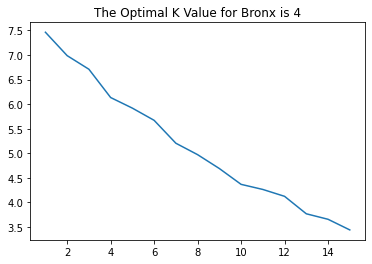

In [39]:
Bronx_venues_1hot = onehot(Bronx_venues)
sse_Bronx = segment_cluster(Bronx_venues_1hot, "Bronx")
plt.title("The Optimal K Value for Bronx is 4")
sse_Bronx

In [40]:
Bronx_venues_1hot.head()

,Neighborhood,Venue Category_Accessories Store,Venue Category_African Restaurant,Venue Category_American Restaurant,Venue Category_Arcade,Venue Category_Arepa Restaurant,Venue Category_Art Gallery,Venue Category_Art Museum,Venue Category_Arts & Crafts Store,Venue Category_Asian Restaurant,Venue Category_Athletics & Sports,Venue Category_Automotive Shop,Venue Category_BBQ Joint,Venue Category_Bagel Shop,Venue Category_Bakery,Venue Category_Bank,Venue Category_Bar,Venue Category_Baseball Field,Venue Category_Basketball Court,Venue Category_Beer Bar,Venue Category_Bike Trail,Venue Category_Boat or Ferry,Venue Category_Bookstore,Venue Category_Bowling Alley,Venue Category_Breakfast Spot,Venue Category_Brewery,Venue Category_Buffet,Venue Category_Burger Joint,Venue Category_Burrito Place,Venue Category_Bus Line,Venue Category_Bus Station,Venue Category_Bus Stop,Venue Category_Café,Venue Category_Candy Store,Venue Category_Caribbean Restaurant,Venue Category_Check Cashing Service,Venue Category_Chinese Restaurant,Venue Category_Clothing Store,Venue Category_Coffee Shop,Venue Category_Comfort Food Restaurant,Venue Category_Construction & Landscaping,Venue Category_Convenience Store,Venue Category_Cosmetics Shop,Venue Category_Cuban Restaurant,Venue Category_Dance Studio,Venue Category_Deli / Bodega,Venue Category_Department Store,Venue Category_Dessert Shop,Venue Category_Diner,Venue Category_Discount Store,Venue Category_Distillery,Venue Category_Dive Bar,Venue Category_Donut Shop,Venue Category_Eastern European Restaurant,Venue Category_Electronics Store,Venue Category_Farmers Market,Venue Category_Fast Food Restaurant,Venue Category_Fish & Chips Shop,Venue Category_Fish Market,Venue Category_Flea Market,Venue Category_Food,Venue Category_Food & Drink Shop,Venue Category_Food Truck,Venue Category_French Restaurant,Venue Category_Fried Chicken Joint,Venue Category_Frozen Yogurt Shop,Venue Category_Furniture / Home Store,Venue Category_Gas Station,Venue Category_Gift Shop,Venue Category_Gourmet Shop,Venue Category_Grocery Store,Venue Category_Gym,Venue Category_Gym / Fitness Center,Venue Category_Harbor / Marina,Venue Category_Hardware Store,Venue Category_History Museum,Venue Category_Home Service,Venue Category_Hookah Bar,Venue Category_Hotel,Venue Category_IT Services,Venue Category_Ice Cream Shop,Venue Category_Indian Restaurant,Venue Category_Indie Theater,Venue Category_Intersection,Venue Category_Italian Restaurant,Venue Category_Juice Bar,Venue Category_Kids Store,Venue Category_Korean Restaurant,Venue Category_Lake,Venue Category_Latin American Restaurant,Venue Category_Laundromat,Venue Category_Lawyer,Venue Category_Liquor Store,Venue Category_Lounge,Venue Category_Market,Venue Category_Martial Arts School,Venue Category_Mattress Store,Venue Category_Medical Supply Store,Venue Category_Men's Store,Venue Category_Metro Station,Venue Category_Mexican Restaurant,Venue Category_Mobile Phone Shop,Venue Category_Music Venue,Venue Category_Nightclub,Venue Category_Paper / Office Supplies Store,Venue Category_Park,Venue Category_Performing Arts Venue,Venue Category_Peruvian Restaurant,Venue Category_Pet Store,Venue Category_Pharmacy,Venue Category_Pizza Place,Venue Category_Platform,Venue Category_Playground,Venue Category_Plaza,Venue Category_Pool,Venue Category_Post Office,Venue Category_Print Shop,Venue Category_Pub,Venue Category_Puerto Rican Restaurant,Venue Category_Rental Car Location,Venue Category_Restaurant,Venue Category_River,Venue Category_Salon / Barbershop,Venue Category_Sandwich Place,Venue Category_Scenic Lookout,Venue Category_Seafood Restaurant,Venue Category_Shoe Store,Venue Category_Shop & Service,Venue Category_Shopping Mall,Venue Category_Smoke Shop,Venue Category_Social Club,Venue Category_Soup Place,Venue Category_South American Restaurant,Venue Category_Spa,Venue Category_Spanish Restaurant,Venue Category_Sports Bar,Venue Category_Sports Club,Venue Category_Storage Facility,Venue Category_Supermarket,Venue

In [41]:
Bronx_venues_1hot.shape

(52, 914)

### Preparing the data for "Manhattan" and find the Optimal K Value to cluster its Neighborhood.

****************************** MANHATTAN ******************************


(    K Value       SSE
 0         1  2.884319
 1         2  2.758241
 2         3  2.640732
 3         4  2.561893
 4         5  2.442475
 5         6  2.365665
 6         7  2.259775
 7         8  2.166048
 8         9  2.062037
 9        10  2.000490
 10       11  1.899568
 11       12  1.836262
 12       13  1.748707
 13       14  1.667633
 14       15  1.581649,
 [<matplotlib.lines.Line2D at 0x1cf2f224a00>])

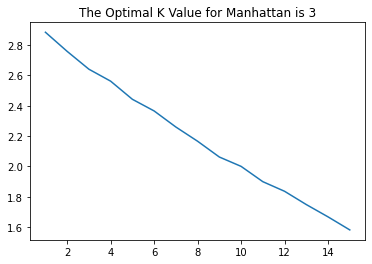

In [42]:
Manhattan_venues_1hot = onehot(Manhattan_venues)
sse_Manhattan = segment_cluster(Manhattan_venues_1hot, "Manhattan")
plt.title("The Optimal K Value for Manhattan is 3")
sse_Manhattan

In [43]:
Manhattan_venues_1hot.shape

(40, 1357)

### Preparing the data for "Brooklyn" and find the Optimal K Value to cluster its Neighborhood.

****************************** BROOKLYN ******************************


(    K Value        SSE
 0         1  10.284639
 1         2   8.299667
 2         3   7.633807
 3         4   7.555123
 4         5   6.993761
 5         6   6.813308
 6         7   6.672328
 7         8   6.273392
 8         9   5.818732
 9        10   5.525619
 10       11   5.561651
 11       12   5.194810
 12       13   5.177229
 13       14   4.953373
 14       15   4.747064,
 [<matplotlib.lines.Line2D at 0x1cf2f27d910>])

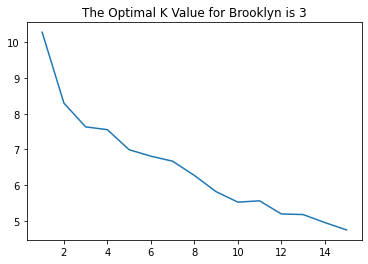

In [44]:
Brooklyn_venues_1hot = onehot(Brooklyn_venues)
sse_Brooklyn = segment_cluster(Brooklyn_venues_1hot, "Brooklyn")
plt.title("The Optimal K Value for Brooklyn is 3")
sse_Brooklyn

In [45]:
Brooklyn_venues_1hot.shape

(70, 1625)

### Preparing the data for "Queens" and find the Optimal K Value to cluster its Neighborhood.

****************************** QUEENS ******************************


(    K Value        SSE
 0         1  18.378939
 1         2  16.425941
 2         3  14.510256
 3         4  13.526205
 4         5  12.313073
 5         6  11.677662
 6         7  11.078525
 7         8  10.308457
 8         9  10.015584
 9        10   9.427175
 10       11   9.132556
 11       12   8.731163
 12       13   8.620152
 13       14   8.175159
 14       15   7.779490,
 [<matplotlib.lines.Line2D at 0x1cf310b4e20>])

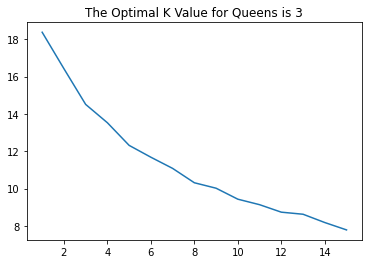

In [46]:
Queens_venues_1hot = onehot(Queens_venues)
sse_Queens = segment_cluster(Queens_venues_1hot, "Queens")
plt.title("The Optimal K Value for Queens is 3")
sse_Queens

In [47]:
Queens_venues_1hot.shape

(81, 1513)

### Preparing the data for "Staten Island" and find the Optimal K Value to cluster its Neighborhood.

****************************** STATEN ISLAND ******************************


(    K Value        SSE
 0         1  20.486689
 1         2  18.847055
 2         3  16.882738
 3         4  16.113555
 4         5  15.043977
 5         6  14.146085
 6         7  13.773766
 7         8  12.894930
 8         9  11.997881
 9        10  11.397333
 10       11  11.053491
 11       12  10.205428
 12       13   9.597522
 13       14   9.214689
 14       15   8.914103,
 [<matplotlib.lines.Line2D at 0x1cf31111250>])

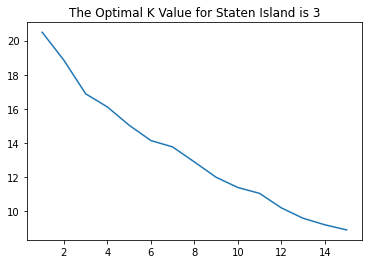

In [48]:
Staten_venues_1hot = onehot(Staten_venues)
sse_Staten = segment_cluster(Staten_venues_1hot, "Staten Island")
plt.title("The Optimal K Value for Staten Island is 3")
sse_Staten

In [49]:
Staten_venues_1hot.shape

(63, 835)

### Model buliding with optimal K value for all the Borough.

In [50]:
# Bronx
K_Bronx_cluster = 4

X_Bronx = Bronx_venues_1hot.drop("Neighborhood", axis = 1).values
cluster_Bronx     = KMeans(n_clusters = K_Bronx_cluster, init='k-means++', n_init = 12, algorithm='auto',)
cluster_Bronx.fit(X_Bronx)


KMeans(n_clusters=4, n_init=12)

In [51]:
# Manhattan
K_Manhattan_cluster = 4

X_Manhattan = Manhattan_venues_1hot.drop("Neighborhood", axis = 1).values
cluster_Manhattan = KMeans(n_clusters = K_Manhattan_cluster, init='k-means++', n_init = 12, algorithm='auto',)
cluster_Manhattan.fit(X_Manhattan)


KMeans(n_clusters=4, n_init=12)

In [52]:
# Brooklyn
K_Brooklyn_cluster = 3

X_Brooklyn = Brooklyn_venues_1hot.drop("Neighborhood", axis = 1).values
cluster_Brooklyn  = KMeans(n_clusters = K_Brooklyn_cluster, init='k-means++', n_init = 12, algorithm='auto',)
cluster_Brooklyn.fit(X_Brooklyn)

KMeans(n_clusters=3, n_init=12)

In [53]:
# Queens
K_Queens_cluster = 3

X_Queens = Queens_venues_1hot.drop("Neighborhood", axis = 1).values
cluster_Queens    = KMeans(n_clusters = K_Queens_cluster, init='k-means++', n_init = 12, algorithm='auto',)
cluster_Queens.fit(X_Queens)

KMeans(n_clusters=3, n_init=12)

In [54]:
# Staten Island
K_Staten_cluster = 3

X_Staten = Staten_venues_1hot.drop("Neighborhood", axis = 1).values
cluster_Staten    = KMeans(n_clusters = K_Staten_cluster, init='k-means++', n_init = 12, algorithm='auto',)
cluster_Staten.fit(X_Staten)

KMeans(n_clusters=3, n_init=12)

In [55]:
Bronx_venues_1hot.insert(0, "Bronx Labels", cluster_Bronx.labels_)
Manhattan_venues_1hot.insert(0, "Manhattan Labels", cluster_Manhattan.labels_)
Brooklyn_venues_1hot.insert(0, "Brooklyn Labels", cluster_Brooklyn.labels_)
Queens_venues_1hot.insert(0, "Queens Labels", cluster_Queens.labels_)
Staten_venues_1hot.insert(0, "Staten Labels", cluster_Staten.labels_)

In [56]:
Bronx_Labels = Bronx_venues_1hot[["Neighborhood", "Bronx Labels"]]
Bronx_Labels.head()

,Neighborhood,Bronx Labels
0,Allerton,1
1,Baychester,1
2,Bedford Park,1
3,Belmont,1
4,Bronxdale,1


In [57]:
Manhattan_Labels = Manhattan_venues_1hot[["Neighborhood", "Manhattan Labels"]]
Manhattan_Labels.head()

,Neighborhood,Manhattan Labels
0,Battery Park City,1
1,Carnegie Hill,1
2,Central Harlem,1
3,Chelsea,2
4,Chinatown,2


In [58]:
Brooklyn_Labels = Brooklyn_venues_1hot[["Neighborhood", "Brooklyn Labels"]]
Brooklyn_Labels.head()

,Neighborhood,Brooklyn Labels
0,Bath Beach,1
1,Bay Ridge,1
2,Bedford Stuyvesant,1
3,Bensonhurst,1
4,Bergen Beach,1


In [59]:
Queens_Labels = Queens_venues_1hot[["Neighborhood", "Queens Labels"]]
Queens_Labels.head()

,Neighborhood,Queens Labels
0,Arverne,0
1,Astoria,0
2,Astoria Heights,0
3,Auburndale,0
4,Bay Terrace,0


In [60]:
#Staten_venues_1hot.head()

Staten_Labels = Staten_venues_1hot[["Neighborhood", "Staten Labels"]]
Staten_Labels.head()

,Neighborhood,Staten Labels
0,Annadale,1
1,Arden Heights,1
2,Arlington,1
3,Arrochar,1
4,Bay Terrace,1


In [61]:
ny_neighborhoods_Staten.insert(0, "Staten Labels", Staten_Labels["Staten Labels"])
ny_neighborhoods_Staten.head()

,Staten Labels,Borough,Neighborhood,Latitude,Longitude
0,1,Staten Island,St. George,40.644982,-74.079353
1,1,Staten Island,New Brighton,40.640615,-74.087017
2,1,Staten Island,Stapleton,40.626928,-74.077902
3,1,Staten Island,Rosebank,40.615305,-74.069805
4,1,Staten Island,West Brighton,40.631879,-74.107182


In [62]:
ny_neighborhoods_Queens.insert(0, "Queens Labels", Queens_Labels["Queens Labels"])
ny_neighborhoods_Queens.head()

,Queens Labels,Borough,Neighborhood,Latitude,Longitude
0,0,Queens,Astoria,40.768509,-73.915654
1,0,Queens,Woodside,40.746349,-73.901842
2,0,Queens,Jackson Heights,40.751981,-73.882821
3,0,Queens,Elmhurst,40.744049,-73.881656
4,0,Queens,Howard Beach,40.654225,-73.838138


In [63]:
ny_neighborhoods_Brooklyn.insert(0, "Brooklyn Labels", Brooklyn_Labels["Brooklyn Labels"])
ny_neighborhoods_Brooklyn.head()

,Brooklyn Labels,Borough,Neighborhood,Latitude,Longitude
0,1,Brooklyn,Bay Ridge,40.625801,-74.030621
1,1,Brooklyn,Bensonhurst,40.611009,-73.995180
2,1,Brooklyn,Sunset Park,40.645103,-74.010316
3,1,Brooklyn,Greenpoint,40.730201,-73.954241
4,1,Brooklyn,Gravesend,40.595260,-73.973471


In [64]:
ny_neighborhoods_Manhattan.insert(0, "Manhattan Labels", Manhattan_Labels["Manhattan Labels"])
ny_neighborhoods_Manhattan.head()

,Manhattan Labels,Borough,Neighborhood,Latitude,Longitude
0,1,Manhattan,Marble Hill,40.876551,-73.910660
1,1,Manhattan,Chinatown,40.715618,-73.994279
2,1,Manhattan,Washington Heights,40.851903,-73.936900
3,2,Manhattan,Inwood,40.867684,-73.921210
4,2,Manhattan,Hamilton Heights,40.823604,-73.949688


In [65]:
ny_neighborhoods_Bronx.insert(0, "Bronx Labels", Bronx_Labels["Bronx Labels"])
ny_neighborhoods_Bronx.head()

,Bronx Labels,Borough,Neighborhood,Latitude,Longitude
0,1,Bronx,Wakefield,40.894705,-73.847201
1,1,Bronx,Co-op City,40.874294,-73.829939
2,1,Bronx,Eastchester,40.887556,-73.827806
3,1,Bronx,Fieldston,40.895437,-73.905643
4,1,Bronx,Riverdale,40.890834,-73.912585


## Visualize the clusters on Map

In [71]:
# create Bronx map
Bronx_map_clusters = folium.Map(location=[Bronx_latitude, Bronx_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(K_Bronx_cluster)
ys = [i + x + (i*x)**2 for i in range(K_Bronx_cluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_neighborhoods_Bronx['Latitude'], ny_neighborhoods_Bronx['Longitude'], ny_neighborhoods_Bronx["Neighborhood"], ny_neighborhoods_Bronx["Bronx Labels"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Bronx_map_clusters)
       
Bronx_map_clusters

In [72]:
# create Manhattan map
Manhattan_map_clusters = folium.Map(location=[Manhattan_latitude, Manhattan_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(K_Manhattan_cluster)
ys = [i + x + (i*x)**2 for i in range(K_Manhattan_cluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_neighborhoods_Manhattan['Latitude'], ny_neighborhoods_Manhattan['Longitude'], ny_neighborhoods_Manhattan["Neighborhood"], ny_neighborhoods_Manhattan["Manhattan Labels"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Manhattan_map_clusters)
       
Manhattan_map_clusters

In [73]:
# create Brooklyn map
Brooklyn_map_clusters = folium.Map(location=[Brooklyn_latitude, Brooklyn_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(K_Brooklyn_cluster)
ys = [i + x + (i*x)**2 for i in range(K_Brooklyn_cluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_neighborhoods_Brooklyn['Latitude'], ny_neighborhoods_Brooklyn['Longitude'], ny_neighborhoods_Brooklyn["Neighborhood"], ny_neighborhoods_Brooklyn["Brooklyn Labels"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Brooklyn_map_clusters)
       
Brooklyn_map_clusters

In [74]:
# create Queens map
Queens_map_clusters = folium.Map(location=[Queens_latitude, Queens_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(K_Queens_cluster)
ys = [i + x + (i*x)**2 for i in range(K_Queens_cluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_neighborhoods_Queens['Latitude'], ny_neighborhoods_Queens['Longitude'], ny_neighborhoods_Queens["Neighborhood"], ny_neighborhoods_Queens["Queens Labels"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Queens_map_clusters)
       
Queens_map_clusters

In [75]:
# create Staten map
Staten_map_clusters = folium.Map(location=[Staten_latitude, Staten_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(K_Staten_cluster)
ys = [i + x + (i*x)**2 for i in range(K_Staten_cluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ny_neighborhoods_Staten['Latitude'], ny_neighborhoods_Staten['Longitude'], ny_neighborhoods_Staten["Neighborhood"], ny_neighborhoods_Staten["Staten Labels"]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Staten_map_clusters)
       
Staten_map_clusters

## Conclusion

#### Brooklyn is the Best place to start the Bussiness and found very less competitors.